# Name : Mayuri Mahesh Gade
## Assignement No 14

### RANDOM FOREST

In [15]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [2]:
# Load the dataset
data = pd.read_csv('glass dataset.csv')

### 1. Exploratory Data Analysis (EDA)

In [3]:
# Display the first few rows
print(data.head())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [4]:
# Check for missing values
print(data.isnull().sum())

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [5]:
# Summary statistics
print(data.describe())

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1

### 2. Data Visualization

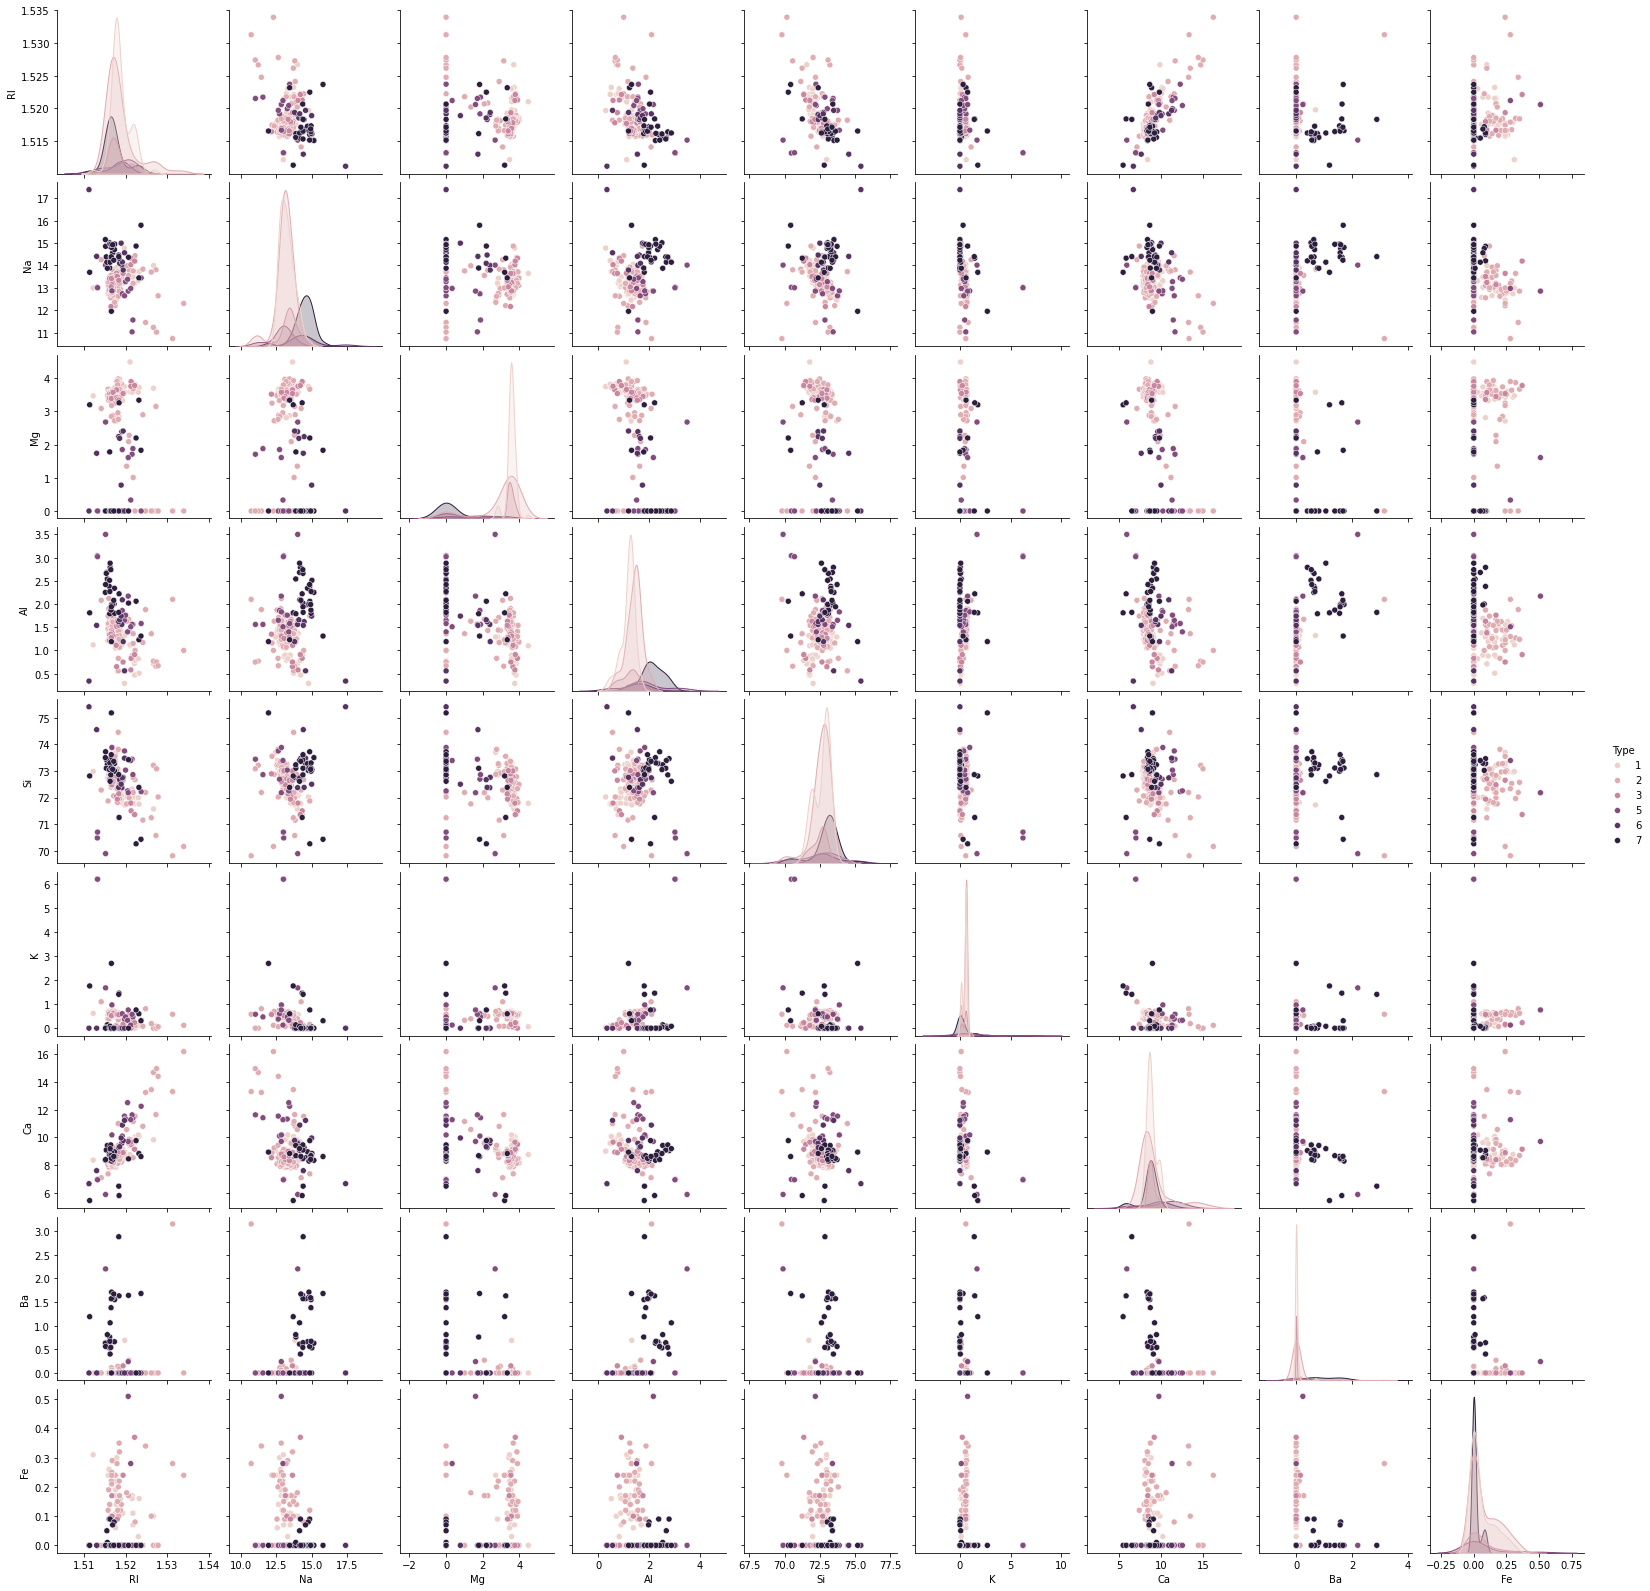

In [6]:
# Pair plot for visualizing relationships between features
sns.pairplot(data, hue='Type')
plt.show()

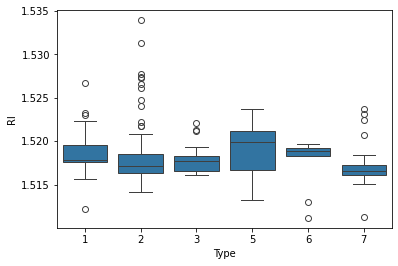

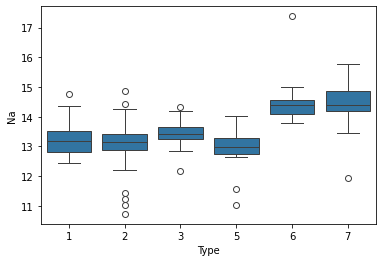

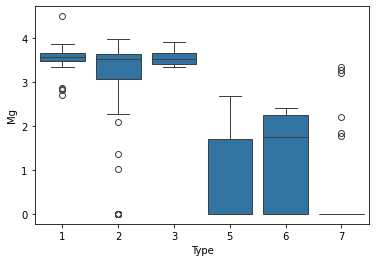

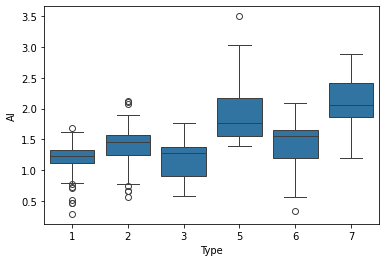

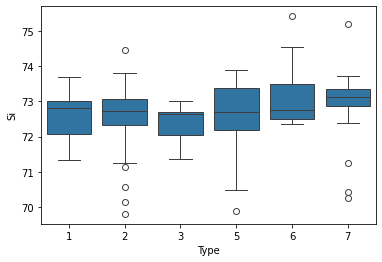

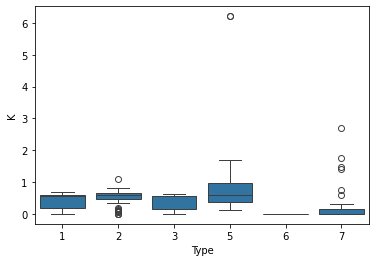

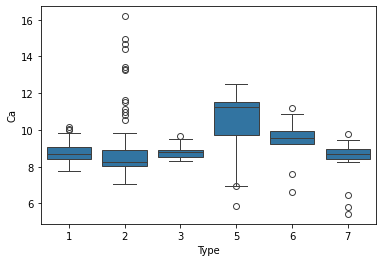

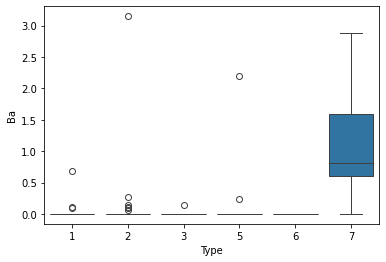

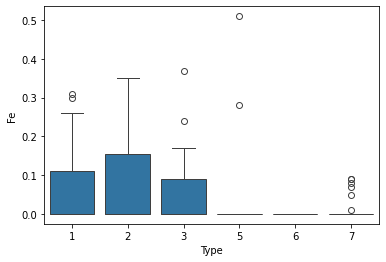

In [7]:
# Box plots to visualize outliers
for column in data.columns[:-1]:  # Excluding the target variable 'Type'
    sns.boxplot(x='Type', y=column, data=data)
    plt.show()

### 3. Data Preprocessing

In [8]:
# Handling missing values (if any)
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [9]:
# Feature Scaling
scaler = StandardScaler()
X = data_imputed.drop(columns='Type')  # Independent variables
y = data_imputed['Type']  # Dependent variable

X_scaled = scaler.fit_transform(X)

### 4. Random Forest Model Implementation

In [ ]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [11]:
# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [13]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

         1.0       0.74      0.89      0.81        19
         2.0       0.75      0.65      0.70        23
         3.0       0.67      0.50      0.57         4
         5.0       0.75      0.50      0.60         6
         6.0       0.75      1.00      0.86         3
         7.0       0.91      1.00      0.95        10

    accuracy                           0.77        65
   macro avg       0.76      0.76      0.75        65
weighted avg       0.77      0.77      0.76        65



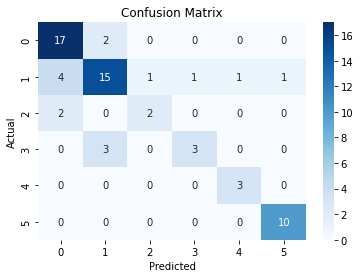

In [14]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### 5. Bagging and Boosting

In [16]:
# Bagging - Random Forest (Already implemented above)
print("Random Forest (Bagging):")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(f'Accuracy (Random Forest): {accuracy_score(y_test, y_pred_rf):.2f}')
print('Classification Report (Random Forest):')
print(classification_report(y_test, y_pred_rf))

Random Forest (Bagging):
Accuracy (Random Forest): 0.77
Classification Report (Random Forest):
              precision    recall  f1-score   support

         1.0       0.74      0.89      0.81        19
         2.0       0.75      0.65      0.70        23
         3.0       0.67      0.50      0.57         4
         5.0       0.75      0.50      0.60         6
         6.0       0.75      1.00      0.86         3
         7.0       0.91      1.00      0.95        10

    accuracy                           0.77        65
   macro avg       0.76      0.76      0.75        65
weighted avg       0.77      0.77      0.76        65



In [17]:
# Boosting - AdaBoost
print("\nAdaBoost (Boosting):")
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)
print(f'Accuracy (AdaBoost): {accuracy_score(y_test, y_pred_ada):.2f}')
print('Classification Report (AdaBoost):')
print(classification_report(y_test, y_pred_ada))



AdaBoost (Boosting):
Accuracy (AdaBoost): 0.51
Classification Report (AdaBoost):
              precision    recall  f1-score   support

         1.0       0.51      0.95      0.67        19
         2.0       0.38      0.35      0.36        23
         3.0       0.00      0.00      0.00         4
         5.0       0.00      0.00      0.00         6
         6.0       0.60      1.00      0.75         3
         7.0       1.00      0.40      0.57        10

    accuracy                           0.51        65
   macro avg       0.42      0.45      0.39        65
weighted avg       0.47      0.51      0.45        65



C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
# Boosting - Gradient Boosting
print("\nGradient Boosting (Boosting):")
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print(f'Accuracy (Gradient Boosting): {accuracy_score(y_test, y_pred_gb):.2f}')
print('Classification Report (Gradient Boosting):')
print(classification_report(y_test, y_pred_gb))



Gradient Boosting (Boosting):
Accuracy (Gradient Boosting): 0.82
Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

         1.0       0.75      0.95      0.84        19
         2.0       0.77      0.74      0.76        23
         3.0       1.00      0.75      0.86         4
         5.0       1.00      0.33      0.50         6
         6.0       0.75      1.00      0.86         3
         7.0       1.00      1.00      1.00        10

    accuracy                           0.82        65
   macro avg       0.88      0.79      0.80        65
weighted avg       0.83      0.82      0.80        65



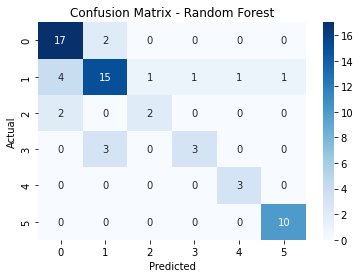

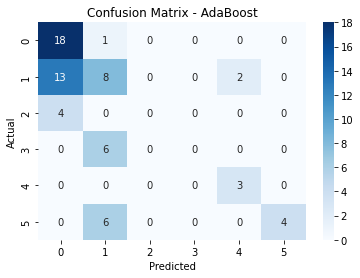

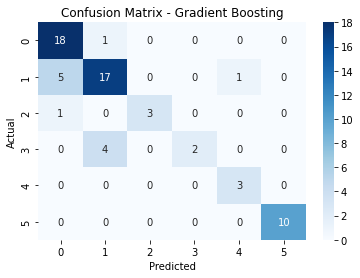

In [19]:
# Visualization of results using Confusion Matrix
models = {'Random Forest': y_pred_rf, 'AdaBoost': y_pred_ada, 'Gradient Boosting': y_pred_gb}

for model_name, predictions in models.items():
    conf_matrix = confusion_matrix(y_test, predictions)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
